# 回帰診断

線形回帰モデルは**外れ値**がある場合や、誤差項の独立性、等分散性、正規性の仮定が満たされない場合、最小二乗法による予測の結果には誤解を生じさせる可能性があり、より適切なモデルやほかの手法を用いる必要がある。  
そのため、**回帰診断**により誤差項がこれらの過程を満たしているか、満たさない場合にはどのような手法を用いるべきかを判断する。

# 残差プロット

$i$番目の実測値$y_i(i=1,2,...,n)$に対して、モデルから得られた予測値を$\hat{y_i}$、残差を$e_i=y_i-\hat{y_i}$とする。  
予測値$\hat{y_i}$を横軸に取り、縦軸に残差$e_i$とるプロットを**残差プロット**という。  
残差プロットを用いることで、外れ値の存在、等分散性、独立性の有無がわかる。

決定係数：0.442


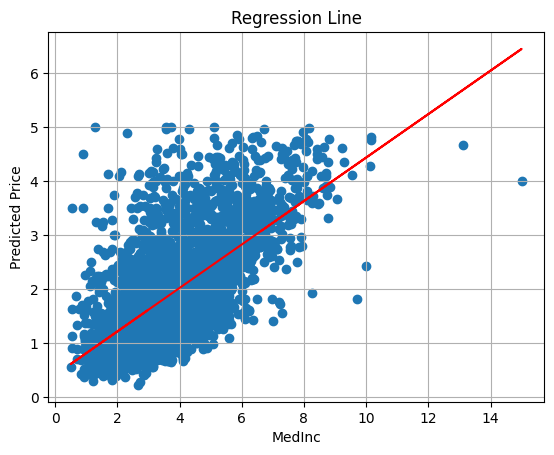

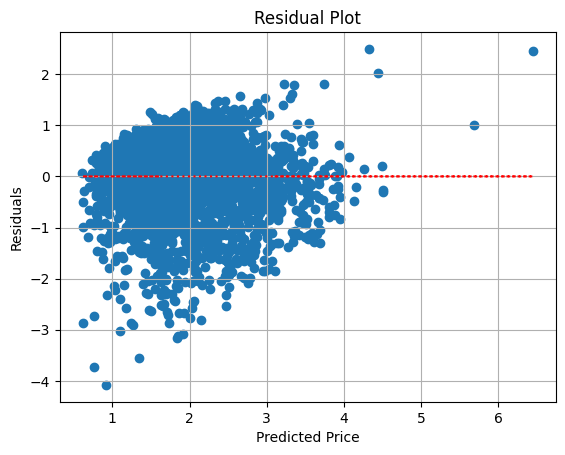

In [2]:
# 残差プロットを実践
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# データセットを取得
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing.data, columns = housing.feature_names)
housing_df['Price'] = housing.target

# 外れ値を除外
housing_df = housing_df[housing_df['HouseAge'] != 52]
housing_df = housing_df[housing_df['Price'] != 5.00001]

# 説明変数と目的変数
explanatory_varname = 'MedInc'
X = housing_df[[explanatory_varname]].values
Y = housing_df['Price'].values

# 訓練データと検証データに分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 0)

# 重回帰分析モデル構築
model = LinearRegression()
model.fit(X_train, Y_train)

# 検証データをで予測
Y_pred = model.predict(X_test)
print(f"決定係数：{r2_score(Y_test, Y_pred):.3f}")

# 回帰直線をプロット
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, color = 'red')
plt.title('Regression Line')
plt.xlabel(explanatory_varname)
plt.ylabel('Predicted Price')
plt.grid()
plt.show()   

# 残差プロットの表示
plt.scatter(Y_pred, Y_pred - Y_test)
plt.plot(Y_pred, [0]*len(Y_pred), linestyle=":", color = 'red')
plt.title('Residual Plot')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.grid()
plt.show() # 外れ値が存在することがわかる

# 正規Q-Qプロット

残差を標準化し、小さい順に並べたものの分位点と、標準正規分布の累積分布関数の分位点をプロットしたものを**正規Q-Qプロット**という。  
誤差項の正規性の仮定が満たされているとき、このプロットは傾き1の直線状に並ぶ。  
この並びから、誤差項の正規性の妥当性チェックできる。

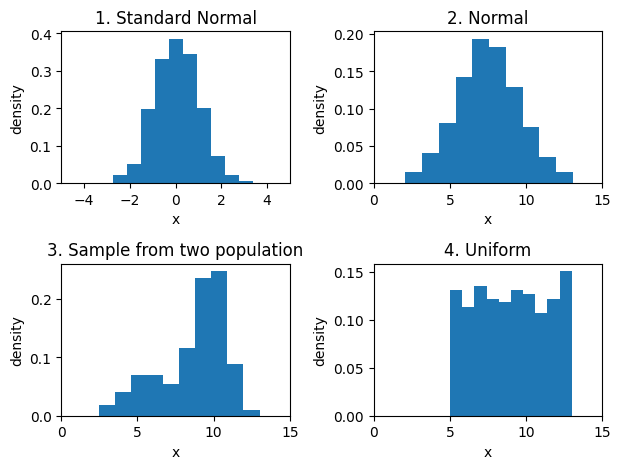

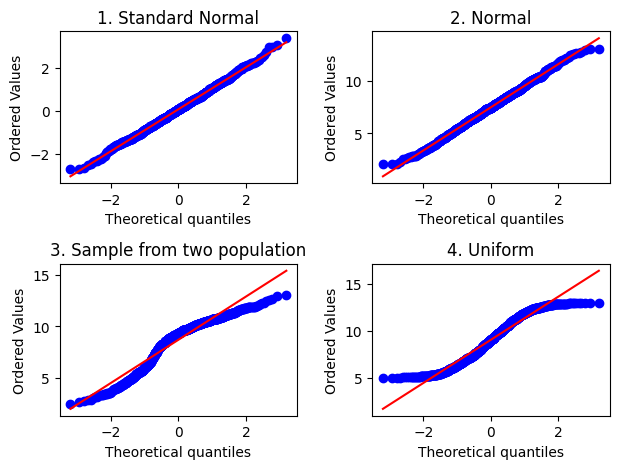

In [3]:
# 正規Q-Qプロットを実践
import numpy as np
from scipy.stats import norm
from scipy.stats import probplot
from scipy.stats import uniform

# 標準正規分布に従うサンプル
data1 = norm.rvs(loc=0, scale=1, size=1000)

# 正規分布に従うサンプル
data2 = norm.rvs(loc=7.5, scale=2, size=1000)

# 2つの母集団からのサンプル
data31 = norm.rvs(loc=10, scale=1, size=700)
data32 = norm.rvs(loc=6, scale=1.5, size=300)
data3 = np.concatenate([data31, data32])

# 一様分布に従うサンプル
data4 = uniform.rvs(loc=5,scale=8,size=1000)
fig, ax = plt.subplots(2, 2)

ax[0, 0].hist(data1, density=True)
ax[0, 0].set_xlabel('x')
ax[0, 0].set_ylabel('density')
ax[0, 0].set_title('1. Standard Normal')
ax[0, 0].set_xlim(-5, 5)

ax[0, 1].hist(data2, density=True)
ax[0, 1].set_xlabel('x')
ax[0, 1].set_ylabel('density')
ax[0, 1].set_title('2. Normal')
ax[0, 1].set_xlim(0, 15)

ax[1, 0].hist(data3, density=True)
ax[1, 0].set_xlabel('x')
ax[1, 0].set_ylabel('density')
ax[1, 0].set_title('3. Sample from two population')
ax[1, 0].set_xlim(0, 15)

ax[1, 1].hist(data4, density=True)
ax[1, 1].set_xlabel('x')
ax[1, 1].set_ylabel('density')
ax[1, 1].set_title('4. Uniform')
ax[1, 1].set_xlim(0, 15)

plt.tight_layout()
plt.show()

# 正規Q-Qプロットで確認
fig, ax = plt.subplots(2, 2)
probplot(data1, plot=ax[0, 0])
probplot(data2, plot=ax[0, 1])
probplot(data3, plot=ax[1, 0])
probplot(data4, plot=ax[1, 1])
ax[0, 0].set_title('1. Standard Normal')
ax[0, 1].set_title('2. Normal')
ax[1, 0].set_title('3. Sample from two population')
ax[1, 1].set_title('4. Uniform')
plt.tight_layout()
plt.show()

正規分布以外は直線に乗らないことが確認できる。
また、残差プロットで使用したデータをQ-Qプロットしてみる。

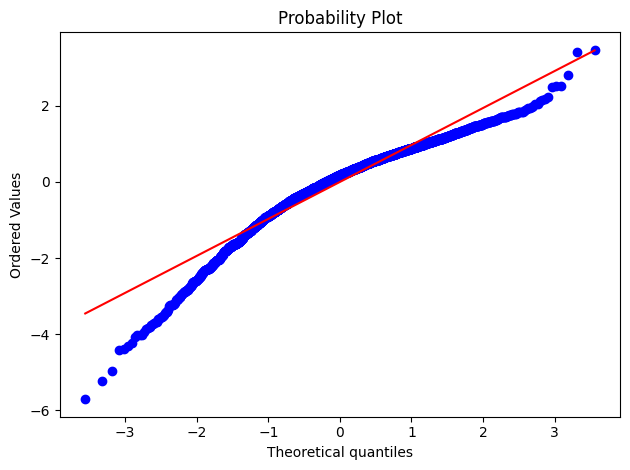

In [4]:
from scipy.stats import zscore

# 残差を標準化する
res_std = zscore(Y_pred - Y_test)

fig, ax = plt.subplots(1, 1)
probplot(res_std, plot=ax)
plt.tight_layout()
plt.show()

正規性が怪しいことが確認できる

# 標準化残差の絶対値の平方根プロット

標準化された残差の絶対値の全体像を観察する。  
残差プロットが残差全体の動きを見ているのに対し、標準化残差の絶対値の平方根プロットは残差の大きさに注目している。  
特に、プロットが予測値に対して増加または減少する傾向があるときは、等分散性が成り立っていないと明確に判断できる。

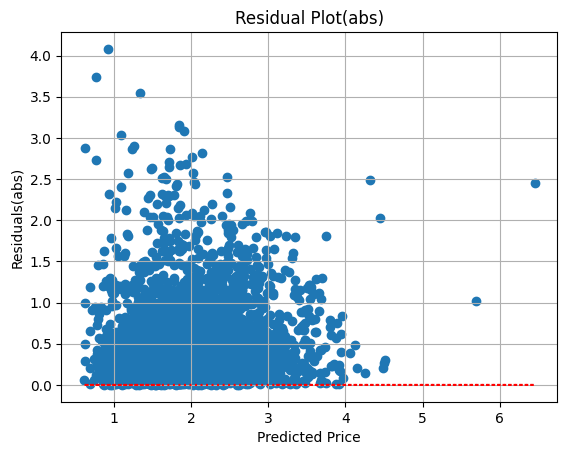

In [5]:
# 残差プロットで使用したデータでプロットしてみる
plt.scatter(Y_pred, abs(Y_pred-Y_test))
plt.plot(Y_pred, [0]*len(Y_pred), linestyle=":", color = 'red')
plt.title('Residual Plot(abs)')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals(abs)')
plt.grid()
plt.show()

等分散性が成立していないことがわかる

# leverage(てこ比、てこ値)とCookの距離

$n \times p$の説明変数行列$X$のランクが$p$であれば、$\hat{\beta}=(X^TX)^{-1}X^Ty$は$\beta$の最小二乗法による推定量となり、
$H = X(X^TX)^{-1}X^T =(h_{ij})$とおくと、予測値は$\hat{y}=Hy$と書くことができる。  
$H = (h_{ij})$は**ハット行列**、$i$番目の対角要素$h_{ii}$はi番目の観測値の**leverage**(**てこ比、てこ値**)とよぶ。  
leverageは各観測値の回帰係数への影響度を判断することができ、この値が大きい観測値はモデルへの影響力が大きいと判断し、時には外れ値の候補となる。

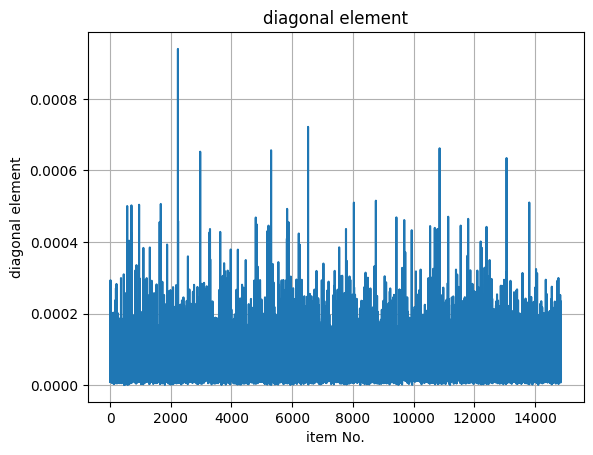

決定係数：0.442
決定係数(外れ値なし):0.442


In [6]:
# 残差プロットで使用したデータでプロットしてみる
hat_matrix = np.dot(
    np.dot(X_train, np.linalg.matrix_power(np.dot(X_train.T, X_train), -1)),
    X_train.T
)

diagonal_element = np.diag(hat_matrix) # 対角要素を抽出
plt.plot(range(0, len(diagonal_element)), diagonal_element)
plt.title('diagonal element')
plt.xlabel("item No.")
plt.ylabel('diagonal element')
plt.grid()
plt.show()

# 外れ値を排除した状態でモデル構築し、決定係数の変化を確認してみる
threshold = 0.025
outlier_index_list = [i for i, x in enumerate(diagonal_element) if x>=threshold]

X_train_without_outlier = np.copy(X_train)
X_train_without_outlier = np.delete(X_train_without_outlier, outlier_index_list)
X_train_without_outlier = X_train_without_outlier.reshape([len(X_train_without_outlier), 1])
Y_train_without_outlier = np.copy(Y_train)
Y_train_without_outlier = np.delete(Y_train_without_outlier, outlier_index_list)
Y_train_without_outlier = Y_train_without_outlier.reshape([len(Y_train_without_outlier), 1])

# 回帰モデル構築
model_without_outlier = LinearRegression()
model_without_outlier.fit(X_train_without_outlier, Y_train_without_outlier)

Y_pred_without_outlier = model_without_outlier.predict(X_test)
print(f"決定係数：{r2_score(Y_test, Y_pred):.3f}")
print(f"決定係数(外れ値なし):{r2_score(Y_test, Y_pred_without_outlier):.3f}")

leverageとともに示される値として、**Cookの距離**がある。  
Cookの距離は標準化された残差と$h_{ii}/(1-h_{ii})$によって計算される。  
すべての観測値を用いた場合の予測値と、$i$番目の観測値を除いた場合の予測値とその差異に関する距離と考えればよく、leverageと同様、各観測値のモデルへの影響力を示す。  
0.5を超えるとその観測値の影響力は大きく、外れ値とされる。

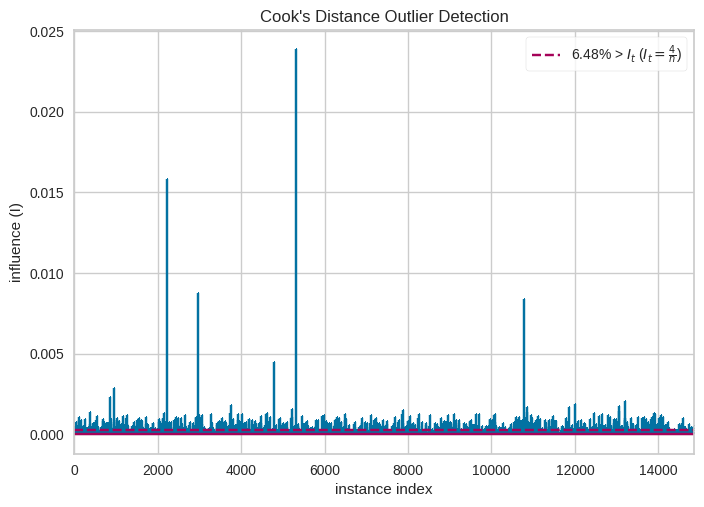

<AxesSubplot: title={'center': "Cook's Distance Outlier Detection"}, xlabel='instance index', ylabel='influence (I)'>

In [7]:
# 残差プロットで使用したデータでCookの距離を計算
from yellowbrick.regressor import CooksDistance

visualizer = CooksDistance()
visualizer.fit(X_train, Y_train)
visualizer.show()

# 自己相関(系列相関)とDW比

残差プロット以外にも、残差の独立性を判断する方法もいくつかある。  
方法としては、**自己相関(系列相関)**と**DW比**というものがある。  
自己相関の多くは時系列データにおいて見られる現象である。ある残差が前後のずれた時間の残差と関係しており、何らかの規則性を見て取れる場合、自己相関があるという。  
DW比は自己相関の有無を判断する値で、残差から導かれる。  
DW比は0から4の値をとり、一般的に、値が2に近いと自己相関はない。  
0に近いと正の自己相関、4に近いと負の自己相関があると判断する。  
詳細は「27_時系列解析.ipynb」で記載する

In [8]:
# 残差プロットで使用したデータでDW比を計算
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

ols = sm.OLS(Y_train, X_train)
results = ols.fit()

print(f"DW比:{durbin_watson(results.resid)}") # 自己相関なし

DW比:2.00359739128523
